In [1]:
! pip install rembg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 11.2 MB/s eta 0:00:00


100%|████████████████████████████████████████| 176M/176M [00:00<00:00, 141GB/s]


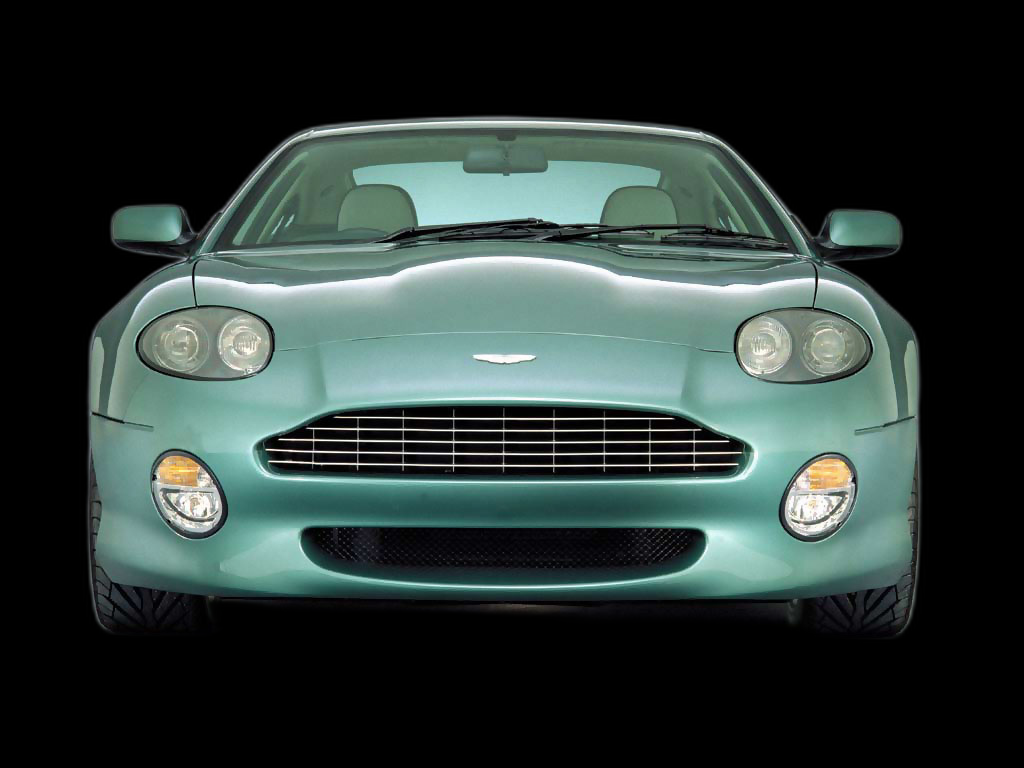

In [3]:
# 照片去背
from rembg import remove
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow

input_path = 'Car.bmp'
output_path = 'output.png'
input = Image.open(input_path)
output = remove(input)
output.save(output_path)

img = cv2.imread('output.png')
cv2_imshow(img)

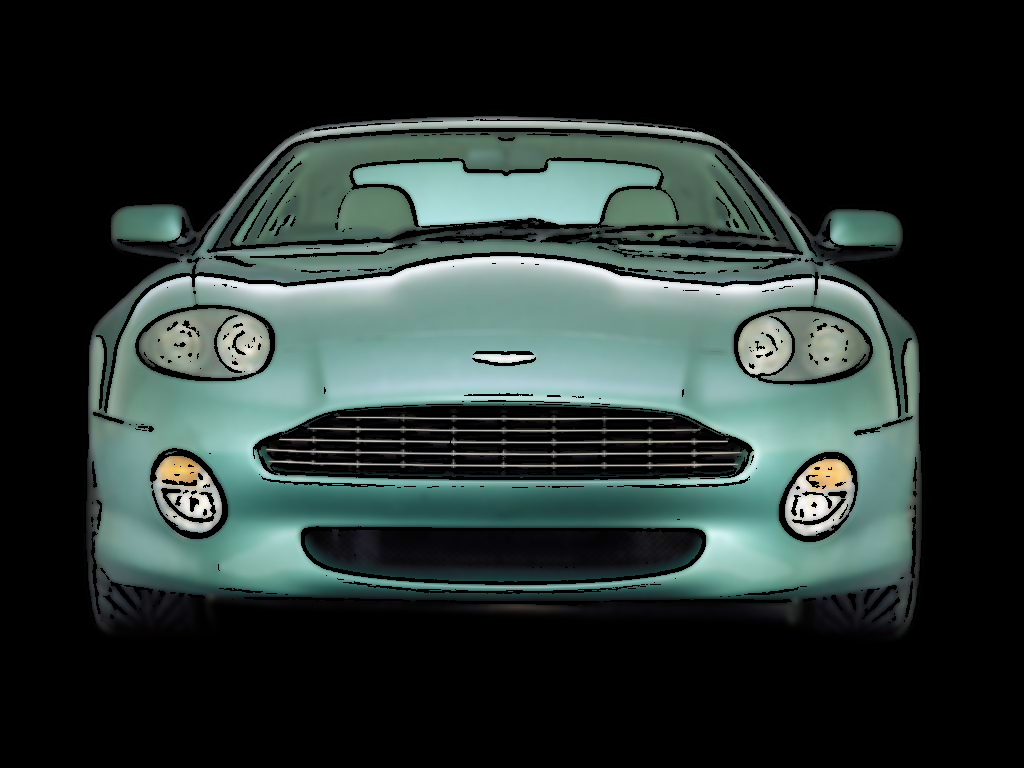

In [4]:
import cv2
import numpy as np

# 读取输入图像
image = cv2.imread('input.jpg')

# 转换图像为灰度
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 应用中值模糊以减少噪声
gray = cv2.medianBlur(gray, 5)

# 检测图像中的边缘
edges = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 9)

# 应用颜色量化来创建卡通效果
color_quantization = cv2.bilateralFilter(img, 9, 300, 300)

# 合并边缘和颜色量化图像
cartoon = cv2.bitwise_and(color_quantization, color_quantization, mask=edges)

# 保存卡通效果图像
cv2_imshow(cartoon)


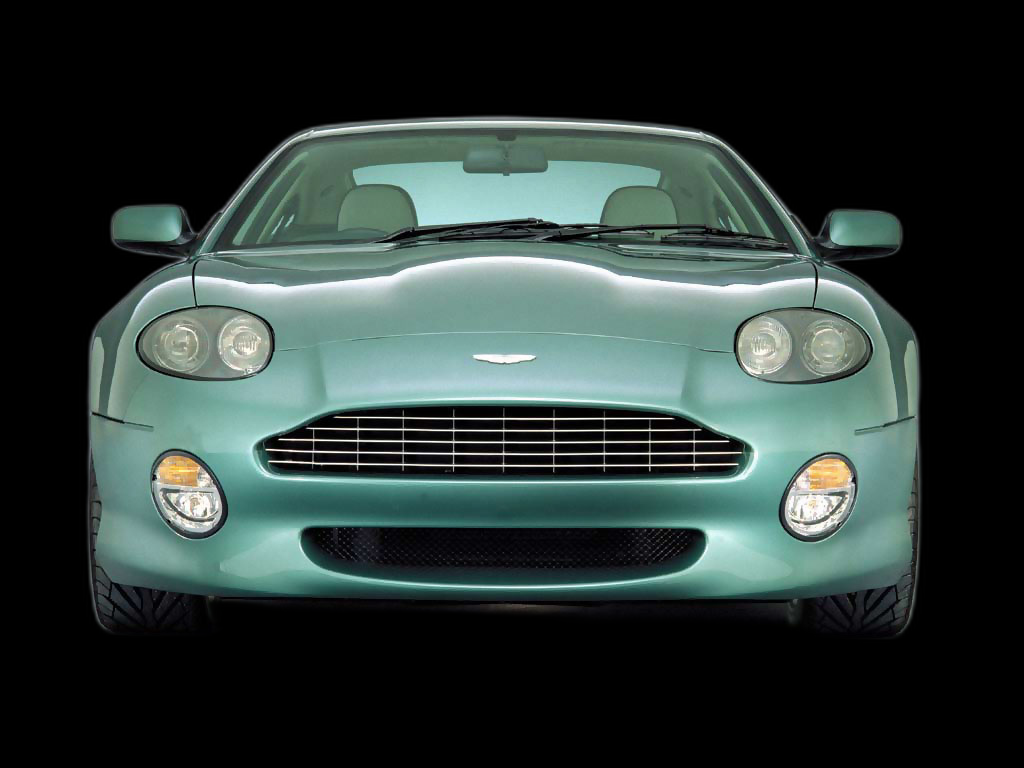

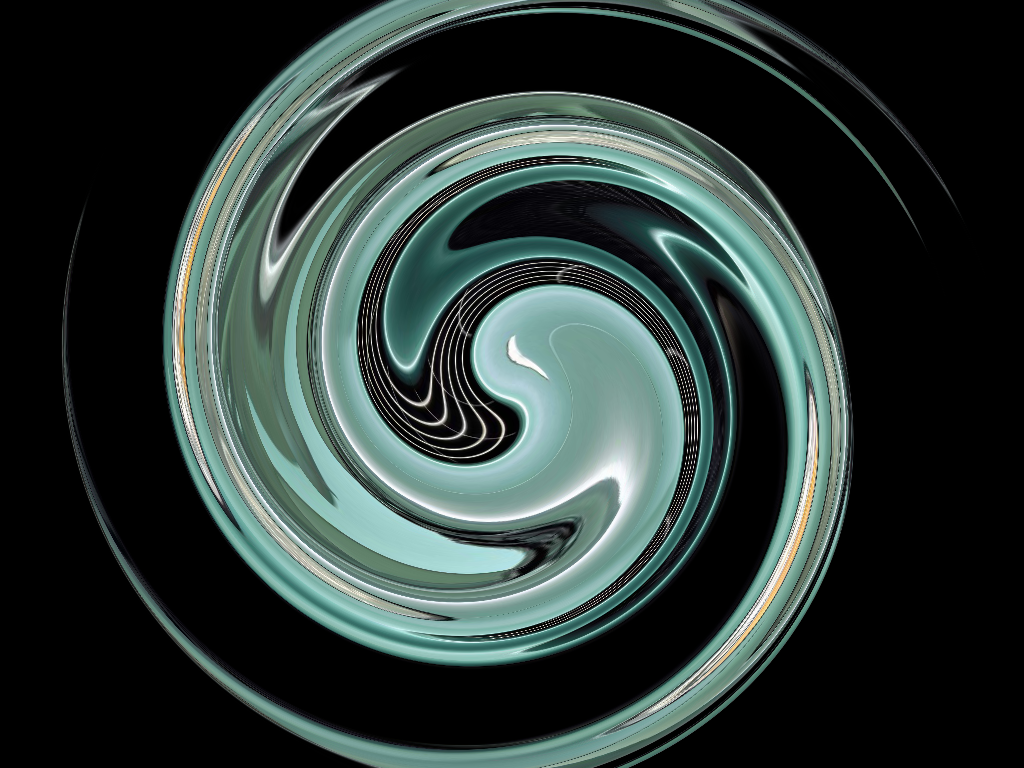

In [7]:
import numpy as np
import cv2

def twirl_effect( f, K ):
	nr, nc = f.shape[:2]
	map_x = np.zeros( [nr, nc], dtype = 'float32' )
	map_y = np.zeros( [nr, nc], dtype = 'float32' )
	x0, y0 = nr // 2, nc // 2
	for x in range( nr ):
		for y in range( nc ):
			r = np.sqrt( ( x - x0 ) ** 2 + ( y - y0 ) ** 2 )
			if r == 0:  theta = 0
			else:		theta = np.arccos( ( x - x0 ) / r )
			if y - y0 < 0:  theta = -theta
			phi = theta + r / K
			map_x[x,y] = np.clip( y0 + r * np.sin( phi ), 0, nc - 1 )
			map_y[x,y] = np.clip( x0 + r * np.cos( phi ), 0, nr - 1 )
	g = cv2.remap( f, map_x, map_y, cv2.INTER_LINEAR )
	return g

def main( ):
	# img1 = cv2.imread( "2021020900894-1.jpg", -1 )
	img2 = twirl_effect( img, 50 )
	cv2_imshow( img )
	cv2_imshow( img2 )
	cv2.waitKey( 0 )

main( )

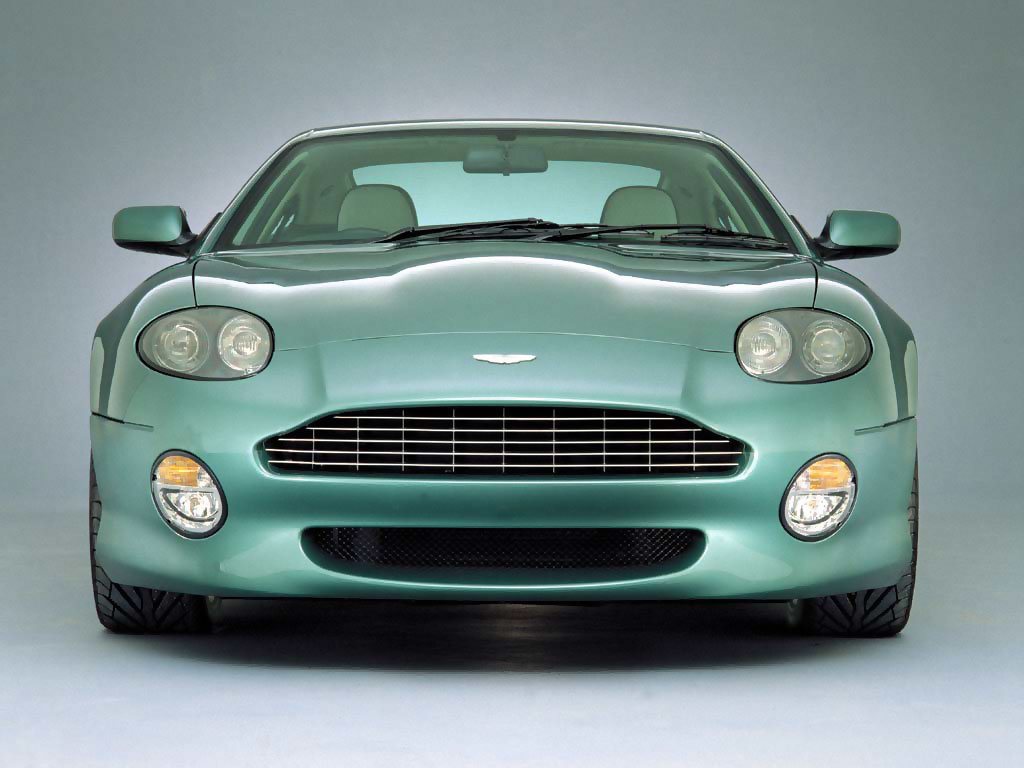

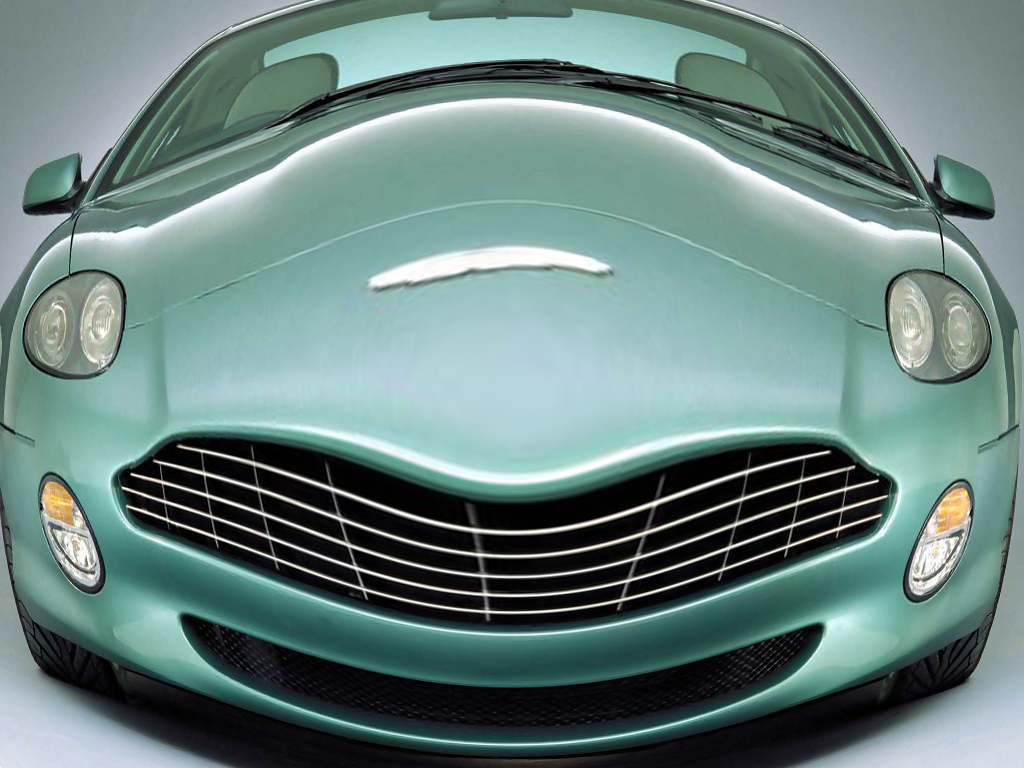

In [8]:
import numpy as np
import cv2

def fisheye_effect( f ):
	nr, nc = f.shape[:2]
	map_x = np.zeros( [nr, nc], dtype = 'float32' )
	map_y = np.zeros( [nr, nc], dtype = 'float32' )
	x0, y0 = nr // 2, nc // 2
	R = np.sqrt( nr ** 2 + nc ** 2 ) / 2
	for x in range( nr ):
		for y in range( nc ):
			r = np.sqrt( ( x - x0 ) ** 2 + ( y - y0 ) ** 2 )
			if r == 0:  theta = 0
			else:		theta = np.arccos( ( x - x0 ) / r )
			r = ( r * r ) / R
			if y - y0 < 0:  theta = -theta
			map_x[x,y] = np.clip( y0 + r * np.sin( theta ), 0, nc - 1 )
			map_y[x,y] = np.clip( x0 + r * np.cos( theta ), 0, nr - 1 )
	g = cv2.remap( f, map_x, map_y, cv2.INTER_CUBIC )
	return g

def main( ):
	img1 = cv2.imread( "Car.bmp", -1 )
	img2 = fisheye_effect( img1 )
	cv2_imshow( img1 )
	cv2_imshow( img2 )
	cv2.waitKey( 0 )

main( )